In [1]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sigmaclip

In [2]:
dataframe = pd.read_csv('melb_data.csv')

# Был взят датасет цены недвижимости в г. Мельбрун

In [3]:
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Посмотрим график цены

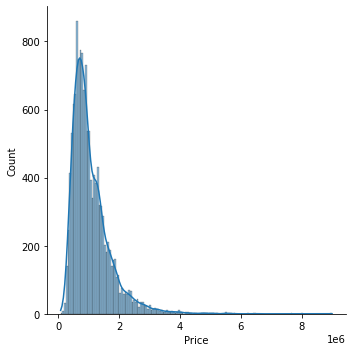

In [4]:
sns.displot((dataframe.Price), kde=True)

Как видно распределение не очень близко к нормальному, поэтому используем sigmaclip для приведение к более нормальной форме

In [5]:
dataframe.Rooms.unique()

array([ 2,  3,  4,  1,  6,  5,  8,  7, 10], dtype=int64)

Анализ будет произведён по 2м критериям: количество комнат и количество санузлов

In [6]:
s1 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 1], 3.0, 3.0)[0]).iloc[:50]
s2 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 2], 3.0, 3.0)[0]).iloc[:50]
s3 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 3], 3.0, 3.0)[0]).iloc[:50]
s4 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 4], 3.0, 3.0)[0]).iloc[:50]
s5 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 5], 3.0, 3.0)[0]).iloc[:50]
s6 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 6], 3.0, 3.0)[0]).iloc[:50]
df = pd.DataFrame(data = {'col1': s1.values, 'col2':s2.values, 'col3':s3.values, 'col4':s4.values, 'col5':s5.values, 'col6':s6.values})

s1 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 1.0], 3.0, 3.0)[0]).iloc[:50]
s2 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 2.0], 3.0, 3.0)[0]).iloc[:50]
s3 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 3.0], 3.0, 3.0)[0]).iloc[:50]
s4 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 4.0], 3.0, 3.0)[0]).iloc[:50]
df1 = pd.DataFrame(data = {'col1': s1.values, 'col2':s2.values, 'col3':s3.values, 'col4':s4.values})


Проверим выборки на независимость с помощью критерия $\chi^2$ Пирсона.

In [7]:
_, p, _, _  = st.chi2_contingency(df.T, correction=False)
print('p-value:', p)

alpha = 0.05
if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 0.0
Нулевая гипотеза отвергается


Проверка на нормальность выборок по количеству санузлов

In [8]:
for i in range(4):
    col = 'col' + str(i + 1)
    _, p = st.shapiro(df1[col])
    print(p)
    alpha = 0.01
    if p >= alpha:
        print(f'Нулевая гипотеза принимается')
    else:
        print(f'Нулевая гипотеза отвергается')

0.02442847564816475
Нулевая гипотеза принимается
0.00691588968038559
Нулевая гипотеза отвергается
0.02477012760937214
Нулевая гипотеза принимается
0.8590674996376038
Нулевая гипотеза принимается


Проверка на нормальность выборок по количеству комнат

In [9]:
for i in range(6):
    col = 'col' + str(i + 1)
    _, p = st.shapiro(df[col])
    print(p)
    alpha = 0.01
    if p >= alpha:
        print(f'Нулевая гипотеза принимается')
    else:
        print(f'Нулевая гипотеза отвергается')

0.018657518550753593
Нулевая гипотеза принимается
0.0010572525206953287
Нулевая гипотеза отвергается
0.00019092716684099287
Нулевая гипотеза отвергается
0.003646142315119505
Нулевая гипотеза отвергается
0.06062760949134827
Нулевая гипотеза принимается
0.3931001126766205
Нулевая гипотеза принимается


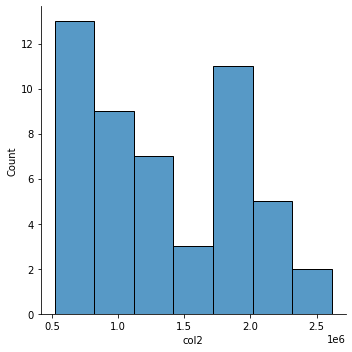

In [10]:
sns.displot(df1.col2)

Построим график коробка с усами для датасета по параметрам цена/количество комнат

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

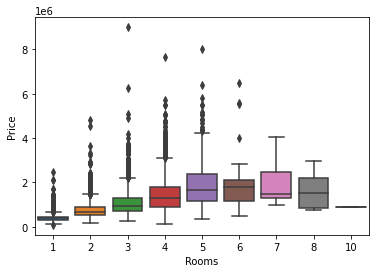

In [11]:
sns.boxplot(x="Rooms", y="Price", data=dataframe)

Построим график коробка с усами для датасета по параметрам цена/количество санузлов

<AxesSubplot:>

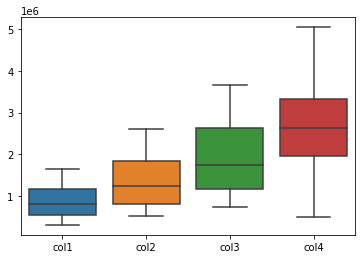

In [12]:
sns.boxplot(data=df1)

Проверка гипотезы о групповом равенстве дисперсий с помошью критерия левена для выборок цена/кол-во комнат

In [13]:
_, p = st.levene(df['col1'], df['col2'], df['col3'], df['col4'], df['col5'], df['col6'])
print(f'p-value: {p:.4f}')

alpha = 0.05
if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 0.0000
Нулевая гипотеза отвергается


Проведём однофакторный дисперсионный анализ на равенствно мат ожиданий выборок цена/кол-во комнат

In [14]:
_, p = st.f_oneway(df['col1'], df['col2'], df['col3'], df['col4'], df['col5'], df['col6'])
print(f'p-value: {p:.4f}')

alpha = 0.05

if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 0.0000
Нулевая гипотеза отвергается


Выясним как группы различаются между собой

Воспользуемся критерием Тьюки

In [15]:
stacked_data1 = df1.stack().reset_index()
stacked_data1 = stacked_data1.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
stacked_data1

,id,group,result
0,0,col1,1480000.0
1,0,col2,1465000.0
2,0,col3,1447500.0
3,0,col4,2840000.0
4,1,col1,1035000.0
...,...,...,...
195,48,col4,2450000.0
196,49,col1,1550000.0
197,49,col2,520000.0
198,49,col3,1750000.0


In [16]:
stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
stacked_data

,id,group,result
0,0,col1,300000.0
1,0,col2,1480000.0
2,0,col3,1465000.0
3,0,col4,1600000.0
4,0,col5,755000.0
...,...,...,...
295,49,col2,620000.0
296,49,col3,1532000.0
297,49,col4,1550000.0
298,49,col5,950000.0


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2  meandiff p-adj     lower        upper     reject
---------------------------------------------------------------
  col1   col2  465250.0  0.001  148353.2195  782146.7805   True
  col1   col3  771400.0  0.001  454503.2195 1088296.7805   True
  col1   col4 1098340.0  0.001  781443.2195 1415236.7805   True
  col1   col5 1902930.0  0.001 1586033.2195 2219826.7805   True
  col1   col6 1263310.0  0.001  946413.2195 1580206.7805   True
  col2   col3  306150.0 0.0652  -10746.7805  623046.7805  False
  col2   col4  633090.0  0.001  316193.2195  949986.7805   True
  col2   col5 1437680.0  0.001 1120783.2195 1754576.7805   True
  col2   col6  798060.0  0.001  481163.2195 1114956.7805   True
  col3   col4  326940.0 0.0388   10043.2195  643836.7805   True
  col3   col5 1131530.0  0.001  814633.2195 1448426.7805   True
  col3   col6  491910.0  0.001  175013.2195  808806.7805   True
  col4   col5  804590.0  0.001  487693.2

c:\users\killm\appdata\local\programs\python\python38\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


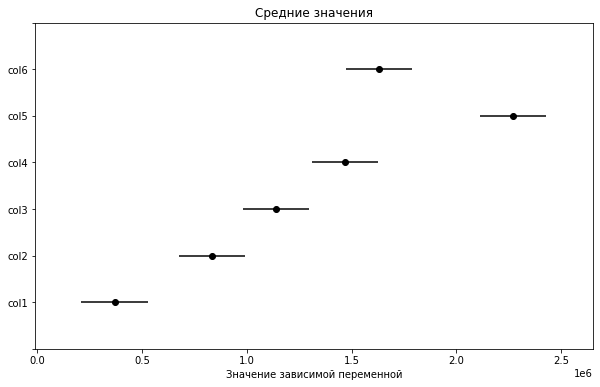

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
# Создадим экземпляр класса MultiComparison и передадим параметры из stacked_data
MultiComp = MultiComparison(stacked_data['result'], stacked_data['group'])
# вычислим значение критерия Тьюки с уровнем значимости 0.05
alpha = 0.05
results = MultiComp.tukeyhsd(alpha)

# результат
print(results.summary())
# визуализируем
fig = results.plot_simultaneous(xlabel='Значение зависимой переменной')
fig.get_axes()[0].title.set_text('Средние значения')

MultiComp1 = MultiComparison(stacked_data1['result'], stacked_data1['group'])
# вычислим значение критерия Тьюки с уровнем значимости 0.05
alpha = 0.05
results = MultiComp1.tukeyhsd(alpha)

# результат
print(results.summary())

Как видно, только гипотезы о равенстве мат ожидания выборок цен 2-комнатных и 3-х | 4-х и 6и проходят

Проведём двухфакторный дисперсионный анализ анализ по факторам: количество санузлов | количество комнат

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Price ~ C(Rooms) + C(Bathroom) + C(Rooms):C(Bathroom)', data=dataframe.iloc[:100]).fit()
sm.stats.anova_lm(model, typ=2)

c:\users\killm\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\users\killm\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\killm\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 7
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Rooms),3.759429e+12,5.0,3.055933,0.052049
C(Bathroom),1.184825e+11,2.0,0.240778,0.624853
C(Rooms):C(Bathroom),4.620121e+12,10.0,1.877783,0.082543
Residual,2.189768e+13,89.0,NaN,NaN


Как видно гипотеза о том что мат ожидания выборок по санузлам проходят хорошо, а выборок по санузлам на грани срыва. Зависимость же обоих этих факторов не сильно вляет на p-коэфициент.